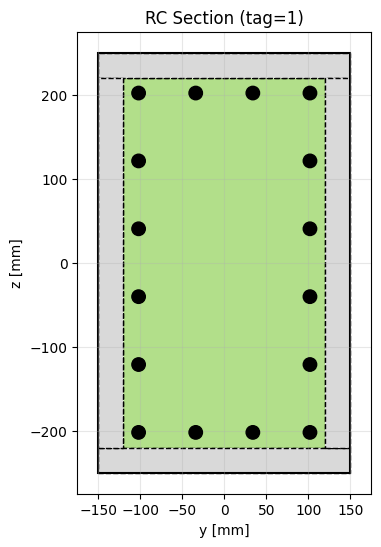

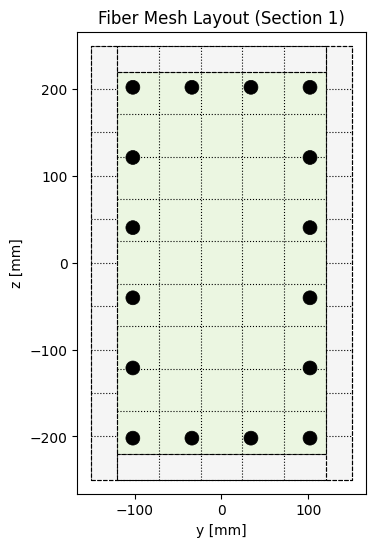

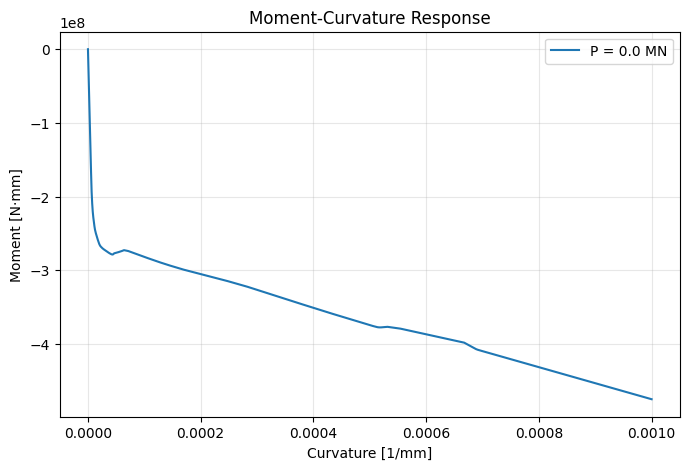

after: 200 iterations  current Norm: 212795 (max: 1e-06, Norm deltaX: 0.00306019)
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 0.653333
OpenSees > analyze failed, returned: -3 error flag


IndexError: Step 1500 out of range [0, 979]

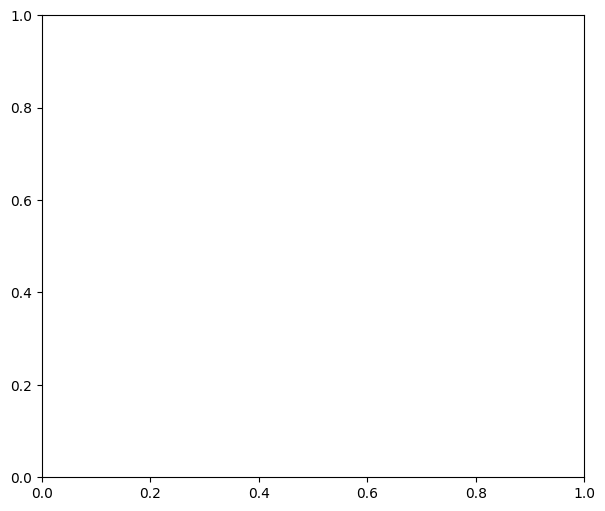

In [ ]:
from apeSees.materials import Material
from apeSees.section import RectangularColumnSection
import matplotlib.pyplot as plt
import numpy as np

# Define G
G=4700*(28)**0.5/(2.0*(1.0+0.20))

# Unconfined Concrete parameters
matTag_UC=1
fpc_UC=-28 # concrete compressive strength at 28 days (compression is negative)
epsc_UC=-0.002 # concrete strain at maximum strength
fpcu_UC=-5.0 # concrete crushing strength
epscu_UC=-0.006 # concrete strain at crushing strength
lambda_UC=0.1 # ratio between unloading slope at epscu and initial slope
ft_UC=0 # concrete tensile strength
Ets_UC=0.0 # tension softening slope

# Confined Concrete parameters
matTag_CC=2
fpc_CC=-33 # concrete compressive strength at 28 days (compression is negative)
epsc_CC=-0.002 # concrete strain at maximum strength
fpcu_CC=-25 # concrete crushing strength
epscu_CC=-0.02 # concrete strain at crushing strength
lambda_CC=0.1 # ratio between unloading slope at epscu and initial slope
ft_CC=0 # concrete tensile strength
Ets_CC=0.0 # tension softening slope

# Steel parameters
matTag_Steel02=3
Fy=414 # yield stress
E0=200000 # initial elastic tangent
b=0.01 # strain hardening ratio
R0=20 # transition parameter
cR1=0.925 # coefficient for the isotropic hardening rule
cR2=0.15 # coefficient for the isotropic hardening rule

# Create materials
concrete_UC = Material(
    "Concrete02", matTag_UC,
    fpc_UC,      # fpc   (compressive strength)
    epsc_UC,     # epsc0 (strain at peak)
    fpcu_UC,     # fpcu  (crushing strength)
    epscu_UC,    # epsU  (ultimate strain)
    lambda_UC,   # lambda (tension stiffening parameter)
    ft_UC,       # ft    (tensile strength)
    Ets_UC       # Ets   (tension softening modulus)
)


concrete_CC = Material(
    "Concrete02", matTag_CC,
    fpc_CC,      # fpc   (confined strength)
    epsc_CC,     # epsc0 (strain at peak)
    fpcu_CC,     # fpcu  (crushing strength)
    epscu_CC,    # epsU  (ultimate strain)
    lambda_CC,   # lambda
    ft_CC,       # ft
    Ets_CC       # Ets
)


steel02 = Material(
    "Steel02", matTag_Steel02,
    Fy,     # yield stress [MPa]
    E0,     # elastic modulus [MPa]
    b,      # strain hardening ratio
    R0,     # transition parameter
    cR1,    # isotropic hardening coeff 1
    cR2     # isotropic hardening coeff 2
)

# Create section
section = RectangularColumnSection(
    B=300.0,
    H=500.0,
    cover=30,
    material_core=concrete_CC,
    material_cover=concrete_UC,
    steel_material=steel02,
    section_tag=1,
    number_of_rebars_along_B=4,
    number_of_rebars_along_H=6,
    phi=16.0,
    G=G
)

section.plot_section()
section.plot_mesh_section()

# Moment-curvature analysis (composite class)
ax, result = section.moment_curvature.plot(
    axial_load=0.0,  # -1 MN compression
    max_curvature=0.001,
    number_of_points=2000
)
plt.show()

# Save results
result.save('mc_analysis.npz')

ax, _ = section.moment_curvature.plot_fibers(axial_load=0,
                                                  number_of_points=1500,
                                                  max_curvature=0.001,
                                                  number_of_iterations=200,
                                                  use_protocol=False,
                                                  step=1500,
                                                  scale_by_area=False,
                                                  color_by='strain',
                                                  theta=90)


# Compare multiple axial loads
fig, ax = plt.subplots(figsize=(10, 6))
for P in [-2e6, -1e6, -0.5e6, 0]:
    section.moment_curvature.plot(
        axial_load=P,
        ax=ax,
        label=f'P = {P/1e6:.1f} MN'
    )
plt.show()